In [1]:
from qpoml import collection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

scalar_context_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/input.csv'
qpo_path = '/mnt/c/Users/Research/Documents/GitHub/MAXI-J1535/final-push/data/pipeline/classification/output.csv'

context_preprocess_dict = {'A':'normalize', 'B':'normalize', 'C':'normalize', 'D':'normalize', 'E':'normalize', 'F':'normalize', 'G':'normalize'}
units = {'frequency':'Hz'}

In [2]:
collec = collection()
collec.load(qpo_csv=qpo_path, context_csv=scalar_context_path, qpo_preprocess=None, context_preprocess=context_preprocess_dict, approach='classification', units=units)
collec.evaluate(model=KNeighborsClassifier(), evaluation_approach='k-fold', folds=5)

In [3]:
print(collec.predictions[0])
print(collec.y_test[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]


[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1] [1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [

/home/yaroslav/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/home/yaroslav/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


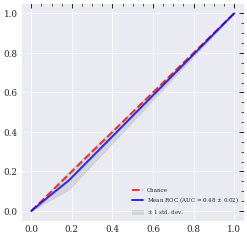

In [4]:
fig, ax = plt.subplots(figsize=(4,4))

from qpoml.plotting import plot_roc   
fpr, tpr, std_tpr, auc, std_auc = collec.roc_and_auc()

plot_roc(fpr, tpr, auc, std_auc, std_tpr, ax = ax)

plt.show()